In [33]:
#Packages Required

In [ ]:
This walkthrough uses the following Python packages:
- NLTK, a natural language toolkit for Python. A useful package for any natural language processing.
For Mac/Unix with pip: $ sudo pip install -U nltk.
- gensim, a topic modeling package containing our LDA model.
For Mac/Unix with pip: $ sudo pip install gensim.

In [ ]:
Libraries

In [ ]:
- Pandas for data manipulation
- Seaborn and Matplotlib for visualization 
- NLTK for natural language processing

In [ ]:
To do:

In [ ]:
- Import data
- Data Cleaning
    1. Remove songs that did not have a verifiable genre
    2. Remove songs that had lyrics of zero length
    3. Remove songs which the release year is before 1970
    4. Translate to english
    5. Focus only on several genre

C:\Users\Sarasati Palawita\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Sarasati Palawita\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
Import Data

In [1]:
from sqlalchemy import create_engine, MetaData, Table, Column, String, Integer, Float, Boolean, DateTime, insert, select
import pandas as pd
import re
import nltk
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from googletrans import Translator
from collections import defaultdict
import matplotlib.pyplot as plt

import numpy as np
from pprint import pprint

import string
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings(action='ignore', category=DeprecationWarning) 
import operator
from functools import reduce
import logging
import datetime
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [2]:
import pandas as pd
from langdetect import detect

In [3]:
df = pd.read_csv('C:/Users/Sarasati Palawita/Documents/Personal/BIPM 2017/Master Thesis 2018/Data/lyrics.csv')

In [4]:
df.head()

,index,song,year,artist,genre,lyrics
0,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
1,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
2,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
3,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
4,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...


In [ ]:
Data - Preprocessing

In [ ]:
#Remove song that the genre is Not Available and Other

In [5]:
df = df[~df['genre'].isin(['Not Available', 'Other'])]

#Remove songs that had lyrics of zero length

In [6]:
def get_length(x):
    try:
        return len(x)
    except:
        return None

In [7]:
df['song_length'] = df['lyrics'].apply(lambda x: get_length(x))
df = df[df['song_length'] != None]

In [8]:
df = df[df['year'] > 1969]

In [9]:
df = df.dropna(subset=['lyrics'])

In [15]:
#To detect the language

In [10]:
def detect_function(song):
    try:
        return detect(song)
    except:
        return "Error"

In [11]:
df['language'] = df['lyrics'].apply(lambda song: detect_function(song))

In [17]:
df.head()

,index,song,year,artist,genre,lyrics,song_length,language
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1961.0,en
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",1270.0,en
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,827.0,en
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2344.0,en
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",1540.0,en


In [14]:
df.to_csv('C:/Users/Sarasati Palawita/Documents/Personal/BIPM 2017/Master Thesis 2018/Data/cleaned_data_all.csv')

In [ ]:
#Language ditribution

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

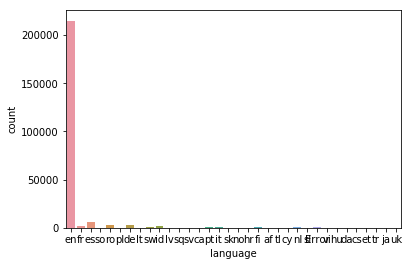

In [23]:
sns.countplot(df['language'])

In [19]:
df['language'].value_counts()

en       214770
es         5738
de         2972
ro         2416
fr         1452
id         1451
it         1288
pt          743
Error       665
sw          647
fi          441
nl          336
tr          306
no          292
tl          281
sv          269
hr          223
hu          171
so          167
pl          130
ca          103
sq          102
da           96
cy           94
af           84
lt           71
et           42
vi           40
sl           32
sk           17
cs            6
lv            3
ja            2
uk            1
Name: language, dtype: int64

In [ ]:
#Exclude non English values

In [24]:
df_en = df[df['language'] == 'en']

In [28]:
#clean_data = df_en

In [25]:
df_en.to_csv('C:/Users/Sarasati Palawita/Documents/Personal/BIPM 2017/Master Thesis 2018/Data/cleaned_data_en.csv')

In [17]:
df_en['language'].value_counts()

en    214770
Name: language, dtype: int64